In [18]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [19]:
df = pd.read_csv('Datasets\data-table.csv')

In [45]:
df

YEAR STATE  RATE DEATHS  \
0    2021    AL  15.8    827   
1    2021    AK  30.8    220   
2    2021    AZ  19.5   1475   
3    2021    AR  20.6    618   
4    2021    CA  10.1   4148   
..    ...   ...   ...    ...   
445  2005    VA  11.2    866   
446  2005    WA  12.8    822   
447  2005    WV  13.2    255   
448  2005    WI  11.6    643   
449  2005    WY  17.3     90   

                                                   URL  
0                /nchs/pressroom/states/alabama/al.htm  
1                 /nchs/pressroom/states/alaska/ak.htm  
2                /nchs/pressroom/states/arizona/az.htm  
3               /nchs/pressroom/states/arkansas/ar.htm  
4             /nchs/pressroom/states/california/ca.htm  
..                                                 ...  
445       /nchs/pressroom/states/virginia/virginia.htm  
446   /nchs/pressroom/states/washington/washington.htm  
447  /nchs/pressroom/states/westvirginia/westvirgin...  
448     /nchs/pressroom/states/wisconsin/wisconsin.htm  
449         /nchs/pressroom/states/wyoming/wyoming.htm  

[450 rows x 5 columns]

In [46]:
column_names = df.columns
print(column_names)

Index(['YEAR', 'STATE', 'RATE', 'DEATHS', 'URL'], dtype='object')


In [5]:
year_values = df['YEAR']
print(year_values)

0      2021
1      2021
2      2021
3      2021
4      2021
       ... 
445    2005
446    2005
447    2005
448    2005
449    2005
Name: YEAR, Length: 450, dtype: int64


In [6]:
filtered_data = df[df['YEAR'] == 2021]
print(filtered_data)

    YEAR STATE  RATE DEATHS                                          URL
0   2021    AL  15.8    827        /nchs/pressroom/states/alabama/al.htm
1   2021    AK  30.8    220         /nchs/pressroom/states/alaska/ak.htm
2   2021    AZ  19.5   1475        /nchs/pressroom/states/arizona/az.htm
3   2021    AR  20.6    618       /nchs/pressroom/states/arkansas/ar.htm
4   2021    CA  10.1   4148     /nchs/pressroom/states/california/ca.htm
5   2021    CO  22.8   1384       /nchs/pressroom/states/colorado/co.htm
6   2021    CT  10.0    401    /nchs/pressroom/states/connecticut/ct.htm
7   2021    DE  13.6    137       /nchs/pressroom/states/delaware/de.htm
8   2021    FL  14.0   3351        /nchs/pressroom/states/florida/fl.htm
9   2021    GA  15.3   1676        /nchs/pressroom/states/georgia/ga.htm
10  2021    HI  13.7    202         /nchs/pressroom/states/hawaii/hi.htm
11  2021    ID  20.5    387          /nchs/pressroom/states/idaho/id.htm
12  2021    IL  11.1   1454       /nchs/pressroom/s

In [16]:
output_excel_file = 'subset_data.xlsx'  
filtered_data.to_excel(output_excel_file, index=False)

In [20]:
# Load data from Excel file (replace 'your_data.xlsx' with your actual file name)
data = pd.read_excel('datasets/suicide_data_2021.xlsx')

# Find the state with the highest and lowest suicide rates
state_with_highest_rate = data.loc[data['RATE'].idxmax()]
state_with_lowest_rate = data.loc[data['RATE'].idxmin()]


# Create the choropleth map without GeoJSON
fig = px.choropleth(
    data_frame=data,
    locations='STATE',  # Assuming your state column is named 'STATE'
    locationmode='USA-states',  # Specify the location mode for US states
    color='RATE',  # Use the 'RATE' column for coloring
    color_continuous_scale="viridis",
    #color_continuous_scale="plasma,inferno,magma,cividis,jet,viridis"
    scope="usa",  # Set the map scope to USA
    title='Suicide Rates by State in the USA (Jul 2021 - Dec 2021)',
    hover_data=['YEAR', 'DEATHS', 'URL']  # Columns to display in hover text
)

# Create a 3D scatter plot with labels for the states with the highest and lowest rates
fig.add_trace(go.Scattergeo(
    locations=[state_with_highest_rate['STATE'], state_with_lowest_rate['STATE']],
    locationmode='USA-states',
    text=[f"Highest Rate ({state_with_highest_rate['RATE']})",
          f"Lowest Rate ({state_with_lowest_rate['RATE']})"],
    marker=dict(size=5, color=['red', 'green']),
    mode='text',
    hoverinfo='text',
))

fig.show()


**Suicide rate for Year 2022 (Jan-Jul)**

In [21]:
import pandas as pd
import plotly.graph_objects as go

# Load the data from the Excel file
excel_file = "datasets/suicide_data_2022.xlsx"  # Replace with the actual path to your Excel file
df = pd.read_excel(excel_file)

# Filter data for months from January to July
months_to_include = ["January", "February", "March", "April", "May", "June", "July"]
df = df[df["Month"].isin(months_to_include)]

# Find the month with the maximum and minimum rate
max_rate_month = df[df["RATE"] == df["RATE"].max()]["Month"].iloc[0]
min_rate_month = df[df["RATE"] == df["RATE"].min()]["Month"].iloc[0]

# Create a stacked bar chart
fig = go.Figure()

# Create traces for each year
for year in df["YEAR"].unique():
    year_data = df[df["YEAR"] == year]
    fig.add_trace(go.Bar(
        x=year_data["Month"],
        y=year_data["RATE"],
        text=[f"{rate:.2f}" for rate in year_data["RATE"]],  # Format as two decimal places
        textposition="outside",  # Display text outside the bars
        name=str(year),
        marker_color='blue'  # Default color
    ))

# Find the indices of max and min rate months
max_rate_index = df[df["Month"] == max_rate_month].index[0]
min_rate_index = df[df["Month"] == min_rate_month].index[0]

# Change the color of max and min rate bars
fig.data[0].marker.color = ['yellow' if i == max_rate_index else 'green' if i == min_rate_index else 'skyblue' for i in range(len(df))]

# Update layout
fig.update_layout(
    barmode='stack',
    title="Stacked Bar Chart of Suicide Rates by Month (Jan to July, 2022)",
    xaxis_title="Month",
    yaxis_title="Suicide Rate",
    showlegend=True
)

# Show the plot
fig.show()


C:\Users\Mohd Uwaish\AppData\Local\Temp\ipykernel_8212\2034410665.py:15: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



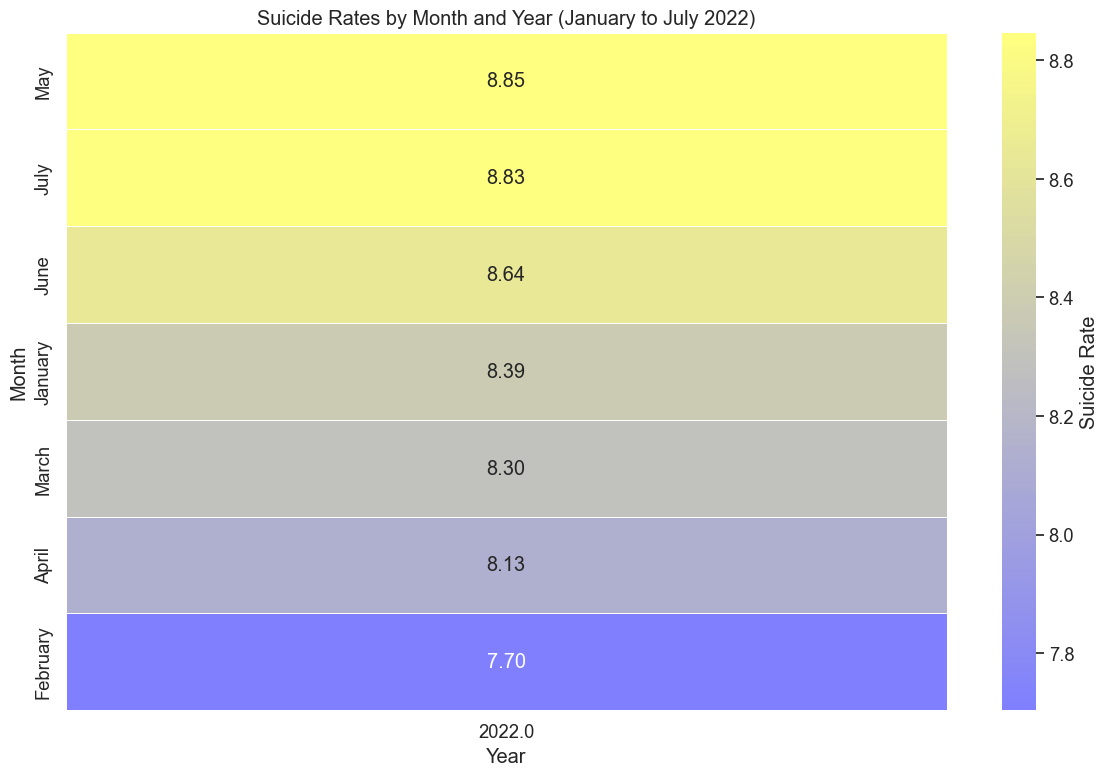

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Load the data from the Excel file
df = pd.read_excel("datasets/suicide_data_2022.xlsx")

# Filter the data to include months from January to July
months_to_include = ["January", "February", "March", "April", "May", "June", "July"]
filtered_df = df[df['Month'].isin(months_to_include)]

# Pivot the filtered data to create a suitable format for the heatmap
heatmap_data = filtered_df.pivot("Month", "YEAR", "RATE")

# Sort the rows (months) by suicide rate in descending order
heatmap_data = heatmap_data.reindex(heatmap_data.mean(axis=1).sort_values(ascending=False).index)

# Calculate the average suicide rate while handling missing values
average_rate = np.nanmean(heatmap_data.values)

# Create a custom color map with slightly darker shades of yellow and blue
colors = [(0.5, 0.5, 1), (1, 1, 0.5)]  # Slightly Darker Blue to Slightly Darker Yellow
n_bins = 100  # Number of bins in the color map
cmap_name = "custom_cmap"
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Create the heatmap, masking NaN values
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.2)  # Adjust font size for better readability
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap=custom_cmap, linewidths=0.5, cbar_kws={"label": "Suicide Rate"}, mask=np.isnan(heatmap_data))

# Customize labels and title
plt.xlabel("Year")
plt.ylabel("Month")
plt.title("Suicide Rates by Month and Year (January to July 2022)")

# Show the plot
plt.tight_layout()
plt.show()


**4)ASA vs abandoned calls–d**

In [29]:
import pandas as pd
import plotly.express as px
import os

# Directory containing the monthly datasets
data_dir = "Datasets/D"

# List of files in the directory
file_list = os.listdir(data_dir)
# Iterate through each file
for file_name in file_list:
    if file_name.endswith('.xlsx'):  # Check if it's an Excel file
        file_path = os.path.join(data_dir, file_name)
        
        # Read the dataset
        df = pd.read_excel(file_path)
        # Check for missing values in 'ASA In-State' and ' Abandoned In-State' columns
        if df['ASA In-State'].isnull().any() or df['Abandoned In-State'].isnull().any():
            raise ValueError(f"There are missing values in 'ASA In-State' or 'Abandoned In-State' columns in {file_name}.")
        
        # Prepare data
        df['Abandoned %'] = df['Abandoned In-State'] / df['Received'] * 100
        
        # Convert 'ASA In-State' to Numeric (Minutes)
        df['ASA In-State'] = df['ASA In-State'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
        
        # Create an interactive scatter plot with hover functionality using Plotly Express
        fig = px.scatter(
            df,
            x='ASA In-State',
            y='Abandoned %',
            color='State',  # Use 'State' column for color
            color_discrete_sequence=px.colors.qualitative.Set1,  # Set a color sequence
            labels={'ASA In-State': 'Average Speed of Answer (Minutes)', 'Abandoned %': 'Abandoned Call Percentage'},
            title=f'State Trends for ASA vs Abandoned Calls - {file_name}'
        )
        
        # Customize hover text
        hover_text = [f"State: {state}<br>ASA: {asa} minutes<br>Abandoned %: {abandoned:.2f}%" for state, asa, abandoned in zip(df['State'], df['ASA In-State'], df['Abandoned %'])]
        fig.update_traces(text=hover_text, hoverinfo='text')
        
        # Show the plot or save it to a file
        # You can choose to display the plot or save it to a file using fig.show() or fig.write_image()
        # For example, to save the plot as a PNG file:
        # fig.write_image(f"scatter_plot_{file_name}.png")
        fig.show()


In [136]:
import pandas as pd
import plotly.express as px
import os
import ipywidgets as widgets
from IPython.display import display, clear_output

# Directory containing the monthly datasets
data_dir = "Datasets/D"

# List of files in the directory
file_list = os.listdir(data_dir)

# Dropdown widget for selecting a dataset
dataset_dropdown = widgets.Dropdown(
    options=file_list,
    description='Select Dataset:',
    disabled=False,
)

# Function to generate and display the scatter plot based on user selection
def generate_scatter_plot(file_name):
    clear_output()  # Clear the output area
    file_path = os.path.join(data_dir, file_name)

    # Read the dataset
    df = pd.read_excel(file_path)

    # Check for missing values in 'ASA In-State' and 'Abandoned In-State' columns
    if df['ASA In-State'].isnull().any() or df['Abandoned In-State'].isnull().any():
        raise ValueError(f"There are missing values in 'ASA In-State' or 'Abandoned In-State' columns in {file_name}.")

    # Prepare data
    df['Abandoned In-State'] = df['Abandoned In-State'].astype(int)  # Ensure it's in integer format
    df['ASA In-State'] = df['ASA In-State'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

    # Create an interactive scatter plot with hover functionality using Plotly Express
    fig = px.scatter(
        df,
        x='ASA In-State',
        y='Abandoned In-State',  # Use 'Abandoned In-State' for the y-axis
        color='State',  # Use 'State' column for color
        color_discrete_sequence=px.colors.qualitative.Set1,  # Set a color sequence
        labels={'ASA In-State': 'Average Speed of Answer (Minutes)', 'Abandoned In-State': 'Abandoned Call Count'},
        title=f'State Trends for Abandoned Calls vs Average Speed of Answer - {file_name}'
    )

    # Customize hover text
    hover_text = [f"State: {state}<br>ASA: {asa} minutes<br>Abandoned Calls: {abandoned}" for state, asa, abandoned in
                  zip(df['State'], df['ASA In-State'], df['Abandoned In-State'])]
    fig.update_traces(text=hover_text, hoverinfo='text')

    # Show the plot
    fig.show()

# Define a callback function to generate the plot when the dropdown value changes
def on_dropdown_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        generate_scatter_plot(change['new'])

# Attach the callback to the dropdown widget
dataset_dropdown.observe(on_dropdown_change)

# Display the dropdown widget initially
display(dataset_dropdown)


In [137]:
import pandas as pd
import plotly.express as px
import os
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

# Directory containing the monthly datasets
data_dir = "Datasets/D"

# List of files in the directory
file_list = os.listdir(data_dir)

# Dropdown widget for selecting a dataset
dataset_dropdown = widgets.Dropdown(
    options=file_list,
    description='Select Dataset:',
    disabled=False,
)

# Output area for displaying the scatter plot
output_area = widgets.Output()

# Function to generate and display the scatter plot based on user selection
def generate_scatter_plot(change):
    with output_area:
        clear_output()  # Clear the output area
        file_name = change.new
        file_path = os.path.join(data_dir, file_name)

        # Read the dataset
        df = pd.read_excel(file_path)

        # Check for missing values in 'ASA In-State' and 'Abandoned In-State' columns
        if df['ASA In-State'].isnull().any() or df['Abandoned In-State'].isnull().any():
            raise ValueError(f"There are missing values in 'ASA In-State' or 'Abandoned In-State' columns in {file_name}.")

        # Prepare data
        df['Abandoned In-State'] = df['Abandoned In-State'].astype(int)  # Ensure it's in integer format
        df['ASA In-State'] = df['ASA In-State'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

        # Create an interactive scatter plot with hover functionality using Plotly Express
        fig = px.scatter(
            df,
            x='ASA In-State',
            y='Abandoned In-State',  # Use 'Abandoned In-State' for the y-axis
            color='State',  # Use 'State' column for color
            color_discrete_sequence=px.colors.qualitative.Set1,  # Set a color sequence
            labels={'ASA In-State': 'Average Speed of Answer (Minutes)', 'Abandoned In-State': 'Abandoned Call Count'},
            title=f'State Trends for Abandoned Calls vs Average Speed of Answer - {file_name}'
        )

        # Customize hover text
        hover_text = [f"State: {state}<br>ASA: {asa} minutes<br>Abandoned Calls: {abandoned}" for state, asa, abandoned in
                      zip(df['State'], df['ASA In-State'], df['Abandoned In-State'])]
        fig.update_traces(text=hover_text, hoverinfo='text')

        # Show the plot
        fig.show()

# Attach the callback to the dropdown widget
dataset_dropdown.observe(generate_scatter_plot, names='value')

# Display the dropdown widget initially
display(dataset_dropdown)

# Display the output area for the scatter plot
display(output_area)


Dropdown(description='Select Dataset:', options=('APRIL-2022.xlsx', 'AUGUST-2021.xlsx', 'DECEMBER-2021.xlsx', …

Output()

**(2)States-wise HDI vs suicide rates**

In [66]:
# Load HDI data from Excel file
hdi_df = pd.read_excel("Datasets/GDL-Subnational-HDI-data.xlsx")

# Load suicide rate data from Excel file
suicide_df = pd.read_excel("Datasets/suicide_data_2021.xlsx")

# Merge the two datasets on the 'State' column
merged_df = pd.merge(hdi_df, suicide_df, on='STATE', how='inner')

# Save the merged data to a new Excel file
merged_df.to_excel("merged_data.xlsx", index=False)

In [121]:
import pandas as pd
import plotly.express as px

# Load the data into a DataFrame named 'df'
df = pd.read_excel("Datasets/HDI_vs_RATE.xlsx")

# Create a scatter plot using plotly.express
fig = px.scatter(
    df,
    x='Value',  # HDI column name
    y='RATE',   # Suicide Rate column name
    labels={'Value': 'HDI (Human Development Index)', 'RATE': 'Suicide Rate', 'STATE': 'State'},
    color='RATE',
    color_continuous_scale="jet",
    #color_continuous_scale="plasma,inferno,magma,cividis,jet,viridis"
    title='State-wise HDI vs Suicide Rate',
    hover_name='STATE'
)

# Customize the appearance of the plot
fig.update_traces(marker=dict(size=10, opacity=0.7))

# Show the plot
fig.show()


In [104]:
import pandas as pd
import plotly.express as px

# Load the data into a DataFrame named 'df'
df = pd.read_excel("Datasets/HDI_vs_RATE.xlsx")

# Create a bubble plot with Plotly Express
fig = px.scatter(
    df,
    x='Value',      # HDI column name
    y='RATE',       # Suicide Rate column name
    #text='STATE',   # State column name for hover text
    labels={'Value': 'HDI (Human Development Index)', 'RATE': 'Suicide Rate'},
    title='State-wise HDI vs Suicide Rate (Bubble Plot)',
    size='RATE',    # Size of the bubble based on suicide rate
    color='STATE'   # Color each bubble by state
)

# Customize the appearance of the plot
fig.update_traces(marker=dict(opacity=0.7),
                  textposition='top center')

# Show the plot
fig.show()

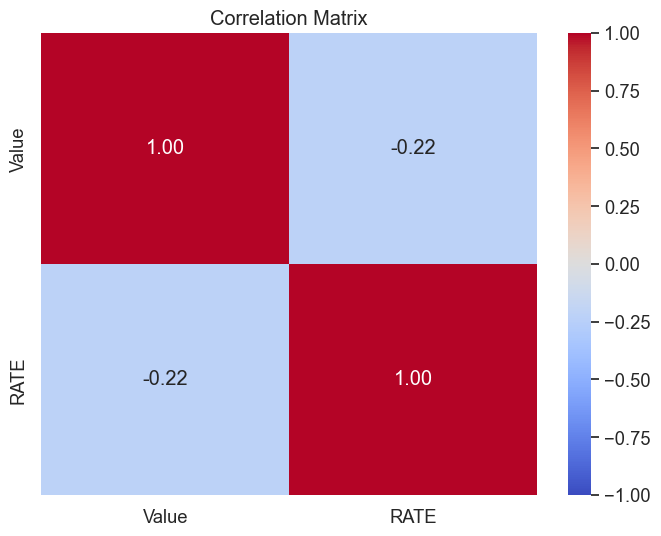

In [12]:
selected_columns = ['Value', 'RATE']

# Create a subset of the DataFrame with selected columns
subset_df = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Generate a heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

**(3)Suicide helpline answer rates vs suicide rates(month wise)

**(5)States-wise talktime month by month**

In [140]:
import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go  # Import go for the bar chart
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive_output

# Directory where your monthly data files are located
data_directory = "Datasets/Data"

# List of file names for each month (assuming you have data for multiple months)
file_names = os.listdir(data_directory)

# Create a dropdown widget for selecting the month
month_dropdown = widgets.Dropdown(
    options=file_names,
    description='Select Month:',
)

# Function to generate and display the choropleth map based on the selected month
def generate_choropleth(month):
    file_path = os.path.join(data_directory, month)
    df = pd.read_excel(file_path)

    # Extract the "Avg. Talk Time In-State" column and add a new column for the month
    month_name = month.split("-")[2]
    df['Month'] = month_name[0:1]

    # Convert "Avg. Talk Time In-State" to total minutes as an integer
    df['Minutes'] = df['Avg. Talk Time In-State'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))

    # Calculate the lowest, highest, and mean values
    lowest_value = df['Minutes'].min()
    print(lowest_value)
    highest_value = df['Minutes'].max()
    mean_value = df['Minutes'].mean()
    state_with_highest_received = df.loc[df['Minutes'].idxmax(), 'State']

    # Create bar graphs for lowest, highest, and mean values
    bar_fig = go.Figure()

    bar_fig.add_trace(go.Bar(
        x=['Lowest', 'Highest', 'Mean'],
        y=[lowest_value, highest_value, mean_value],
        text=[lowest_value, highest_value, mean_value],
        hovertext= ['State with Highest Average Talktime: ' + state_with_highest_received, 
                    'State with Highest Average Talktime: ' + state_with_highest_received, 
                   'Mean Calls'],
        textposition='auto',
    ))

    bar_fig.update_layout(
        title=f'Statistics for Avg. Talk Time In-State in {month[6:13]}',
        xaxis_title='Statistic',
        yaxis_title='Seconds',
    )

    # Create a choropleth map for the month's data
    choropleth_fig = px.choropleth(
        df,
        locations='State',
        locationmode='USA-states',
        color='Avg. Talk Time In-State',  # Use the converted Minutes column for coloring
        hover_name='State',
        hover_data=[ 'Avg. Talk Time In-State', 'State'],  # Include the original time data
        color_continuous_scale='Viridis',
        scope='usa',
        title=f'States-wise Avg. Talk Time In-State for {month[6:13]}'
    )

    # Modify the hovertemplate to include the time data
    choropleth_fig.update_traces(hovertemplate='Avg. Talk Time In-State: %{customdata}')

    # Display the choropleth map and bar chart
    display(choropleth_fig, bar_fig)

# Link the dropdown widget to the plot generation function using interactive_output
output = interactive_output(generate_choropleth, {'month': month_dropdown})

# Display the widgets and the output
display(month_dropdown, output)


Dropdown(description='Select Month:', options=('FINAL-2021-07_988-Monthly-State-Report.xlsx', 'FINAL-2021-08_9…

Output()

In [41]:
import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go  # Import go for the bar chart
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive_output

# Directory where your monthly data files are located
data_directory = "Datasets/Data"

# List of file names for each month (assuming you have data for multiple months)
file_names = os.listdir(data_directory)

# Create a dropdown widget for selecting the month
month_dropdown = widgets.Dropdown(
    options=file_names,
    description='Select Month:',
)

# Create an empty DataFrame to store the combined data
def generate_choropleth(month):
    file_path = os.path.join(data_directory, month)
    df = pd.read_excel(file_path)
    # Extract the "Avg. Talk Time In-State" column and add a new column for the month
    month = file_name.split("-")[2]  # Extract the month from the file name
    df['Month'] = month[0:2]
    combined_df = pd.concat([df[['State', 'Avg. Talk Time In-State', 'Month']]], ignore_index=True)

    # Sort the DataFrame by 'Avg. Talk Time In-State' in descending order
    combined_df = combined_df.sort_values(by='Avg. Talk Time In-State', ascending=True)
    # Create a bar plot for each month's "Avg. Talk Time In-State"
    fig = px.bar(
    combined_df,
    x='State',
    y='Avg. Talk Time In-State',
    color='Month',
    labels={'Avg. Talk Time In-State': 'Average Talk Time In-State (HH:MM)'},
    title=f'States-wise Avg. Talk Time In-State for: {file_name}',
    category_orders={'State': combined_df['State']}  # Specify the order of the 'State' column
    )

    # Show the plot
    fig.show()

# Link the dropdown widget to the plot generation function using interactive_output
output = interactive_output(generate_choropleth, {'month': month_dropdown})

# Display the widgets and the output
display(month_dropdown, output)


Dropdown(description='Select Month:', options=('FINAL-2021-07_988-Monthly-State-Report.xlsx', 'FINAL-2021-08_9…

Output()

**(7)States-wise backup calls**

In [48]:
import os
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
import plotly.graph_objects as go
from IPython.display import display, clear_output
from datetime import datetime

# Directory where your monthly data files are located
data_directory = "Datasets/D"

# List of file names for each month (assuming you have data for multiple months)
file_names = os.listdir(data_directory)

# Create a dropdown widget for selecting the month
file_dropdown = widgets.Dropdown(
    options=file_names,
    description='Select File:',
)

# Output area for displaying plots
output_area = widgets.Output()

# Function to generate and display the choropleth map and the bar chart based on the selected month
def generate_choropleth(selected_file):
    file_path = os.path.join(data_directory, selected_file)
    df = pd.read_excel(file_path)

    # Extract the date from the selected file name (assuming the format "FINAL-YYYY-MM...")
    file_parts = selected_file.split("-")
    file_date = file_parts[1]  # Extract the date part (YYYY-MM)
    
    # Calculate statistics for the "Flowout to Backup" column
    lowest_value = df['Flowout to Backup'].min()
    highest_value = df['Flowout to Backup'].max()
    mean_value = round(df['Flowout to Backup'].mean(), 1)
    state_with_highest_received = df.loc[df['Flowout to Backup'].idxmax(), 'State']
    
    # Create a list of states with zero calls
    states_with_zero_calls = df.loc[df['Flowout to Backup'] == 0, 'State'].tolist()
    
    # Create bar graph for the statistics
    bar_fig = go.Figure()
    
    bar_fig.add_trace(go.Bar(
        x=['Lowest Number of Calls', 'Highest Number of Calls', 'Mean Number of Calls'],
        y=[lowest_value, highest_value, mean_value],
        text=[lowest_value, highest_value, mean_value],
        hovertext=['State with Lowest Calls: ' + state_with_highest_received, 
                   'State with Highest Calls: ' + state_with_highest_received, 
                   'Mean Calls'],
    ))

    bar_fig.update_layout(
        title=f'Statistics for Number of Calls in {selected_file}',
        xaxis_title='Statistic',
        yaxis_title='Number of Calls'
    )

    # Create a choropleth map for the month's data
    fig = px.choropleth(
        df,
        locations='State',
        locationmode='USA-states',
        color='Flowout to Backup',  # Use the "Flowout to Backup" column for coloring
        hover_name='State',
        hover_data=['Flowout to Backup'],  # Include the original data
        color_continuous_scale='plasma',
         #color_continuous_scale="plasma,inferno,magma,cividis,jet,viridis"
        scope='usa',
        title=f'States-wise Flowout to Backup for {selected_file}'
    )
     # Add a text annotation to the bar chart listing states with zero calls at the top with larger font size
    if states_with_zero_calls:
        zero_calls_text = "States with Zero Backup Calls:\n" + "\n".join(states_with_zero_calls)
        bar_fig.add_trace(go.Scatter(
            x=['Lowest Number of Calls'],
            y=[highest_value * 1.2],  # Adjust the Y position to be above the highest bar
            text=[zero_calls_text],
            mode='text',
            textposition='top center',
            textfont=dict(size=14)  # Increase font size to make it bold
        ))
    else:
        zero_calls_text = "No States with Zero Backup Calls"
        bar_fig.add_trace(go.Scatter(
            x=['Lowest Number of Calls'],
            y=[highest_value * 1.2],  # Adjust the Y position to be above the highest bar
            text=[zero_calls_text],
            mode='text',
            textposition='top center',
            textfont=dict(size=14)  # Increase font size to make it bold
        ))

    # Display both the choropleth map and the bar chart
    with output_area:
        clear_output()
        display(fig, bar_fig)

# Event handler for dropdown change
def handle_dropdown_change(change):
    selected_file = change.new
    generate_choropleth(selected_file)

# Link the dropdown widget to the event handler
file_dropdown.observe(handle_dropdown_change, names='value')

# Display widgets
display(file_dropdown)
display(output_area)


Dropdown(description='Select File:', options=('APRIL-2022.xlsx', 'AUGUST-2021.xlsx', 'DECEMBER-2021.xlsx', 'FE…

Output()

**(6)Talktime vs number of calls**

In [42]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import os

# Directory where your monthly data files are located
data_directory = "Datasets/D"

# List of file names for each month (assuming you have data for multiple months)
file_names = os.listdir(data_directory)

# Dropdown widget
file_dropdown = widgets.Dropdown(options=file_names, description='Select File:')

# Output area for displaying graphs
output_area = widgets.Output()

# Initialize the figures as None
fig = None
scatter_fig = None

# Function to generate Plotly graphs
def generate_graphs(selected_file):
    global fig, scatter_fig  # Access the global figures
    
    # Construct the full file path
    file_path = os.path.join(data_directory, selected_file)
    
    # Read the dataset (assuming Excel format)
    df = pd.read_excel(file_path)

    # Calculate statistics for the "Received" column
    lowest_value = df['Received'].min()
    highest_value = df['Received'].max()
    mean_value = round(df['Received'].mean(), 1)
    state_with_highest_received = df.loc[df['Received'].idxmax(), 'State']
    state_with_lowest_received = df.loc[df['Received'].idxmin(), 'State']
    
    # Create bar graph for the statistics
    bar_fig = go.Figure()
    
    bar_fig.add_trace(go.Bar(
        x=['Lowest Number of Calls', 'Highest Number of Calls', 'Mean Number of Calls'],
        y=[lowest_value, highest_value, mean_value],
        text=[lowest_value, highest_value, mean_value],
        hovertext=['State with Lowest Calls: ' + state_with_lowest_received, 
                   'State with Highest Calls: ' + state_with_highest_received, 
                   'Mean Calls'],
    ))

    bar_fig.update_layout(
        title=f'Statistics for Number of Calls in {selected_file}',
        xaxis_title='Statistic',
        yaxis_title='Number of Calls',
        yaxis_type='log'
    )
    
    # Create a Plotly scatter plot for Talktime vs. Number of Calls
    scatter_fig = px.scatter(df,
                             x='Received', 
                             color='State',  # Use the State column for coloring
                             y='Avg. Talk Time In-State', 
                             title=f'Talktime vs. Number of Calls for {selected_file}'
                            )
    scatter_fig.update_xaxes(title_text='Number of Calls')
    scatter_fig.update_yaxes(title_text='Talktime')

    # Clear the previous plots and display the new ones
    with output_area:
        clear_output()
        bar_fig.show()
        scatter_fig.show()

# Event handler for dropdown change
def handle_dropdown_change(change):
    selected_file = change.new
    generate_graphs(selected_file)

# Link the dropdown widget to the event handler
file_dropdown.observe(handle_dropdown_change, names='value')

# Display widgets
display(file_dropdown)
display(output_area)


Dropdown(description='Select File:', options=('APRIL-2022.xlsx', 'AUGUST-2021.xlsx', 'DECEMBER-2021.xlsx', 'FE…

Output()

**(8)Backup calls vs received calls**

In [3]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim

# Step 1: Read Your Data from Excel
# Replace with your actual Excel file and column names
data = pd.read_excel("Datasets/Data/FINAL-2021-07_988-Monthly-State-Report.xlsx")

# Step 2: Filter for contiguous states
contiguous_states = [
    "AL",
    "AZ",
    "AR",
    "CA",
    "CO",
    "CT",
    "DE",
    "FL",
    "GA",
    "ID",
    "IL",
    "IN",
    "IA",
    "KS",
    "KY",
    "LA",
    "ME",
    "MD",
    "MA",
    "MI",
    "MN",
    "MS",
    "MO",
    "MT",
    "NE",
    "NV",
    "NH",
    "NJ",
    "NM",
    "NY",
    "NC",
    "ND",
    "OH",
    "OK",
    "OR",
    "PA",
    "RI",
    "SC",
    "SD",
    "TN",
    "TX",
    "UT",
    "VT",
    "VA",
    "WA",
    "WV",
    "WI",
    "WY",
]

data_filtered = data[data['State'].isin(contiguous_states)]

# Step 2: Initialize Geopy's Nominatim geocoder with a custom user agent
geolocator = Nominatim(user_agent="my_geocoder")

# Step 3: Create a map centered around the contiguous U.S.
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Step 4: Add proportional circles for each contiguous state
for _, row in data_filtered.iterrows():
    state = row['State']
    proportion = row['Flowout to Backup'] / row['Received']

    # Use Geopy to fetch coordinates for the state or territory
    location = geolocator.geocode(state, exactly_one=True)

    if location:
        latitude = location.latitude
        longitude = location.longitude

        # Adjust the circle size based on the proportion
        radius = proportion * 20

        folium.CircleMarker(
            location=[latitude, longitude],
            radius=radius,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6,
            popup=f"{state}: {proportion:.2%}",
        ).add_to(m)

# Display the map
m.save('proportional_symbol_map.html')

In [49]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim
import ipywidgets as widgets
from IPython.display import display

# Load your datasets into a dictionary
datasets = {
    "Dataset 1": pd.read_excel("Datasets/Data/FINAL-2021-07_988-Monthly-State-Report.xlsx"),
    "Dataset 2": pd.read_excel("Datasets/Data/FINAL-2021-08_988-Monthly-State-Report.xlsx"),
    # Add more datasets as needed
}

# Initialize Geopy's Nominatim geocoder with a custom user agent
geolocator = Nominatim(user_agent="my_geocoder")

# Create a function to generate the proportional map
def generate_proportional_map(dataset_name):
    data = datasets.get(dataset_name)
    if data is None:
        print("Dataset not found.")
        return

    # Create a Folium map centered around the contiguous U.S.
    m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

    # Add proportional circles for each contiguous state
    for _, row in data.iterrows():
        state = row['State']
        proportion = row['Flowout to Backup'] / row['Received']

        # Use Geopy to fetch coordinates for the state or territory
        location = geolocator.geocode(state, exactly_one=True)

        if location:
            latitude = location.latitude
            longitude = location.longitude

            # Adjust the circle size based on the proportion
            radius = proportion * 20

            folium.CircleMarker(
                location=[latitude, longitude],
                radius=radius,
                color='red',
                fill=True,
                fill_color='red',
                fill_opacity=0.6,
                popup=f"{state}: {proportion:.2%}",
            ).add_to(m)

    # Display the map
    display(m)

# Create a dropdown widget with dataset names as options
dataset_dropdown = widgets.Dropdown(
    options=list(datasets.keys()),
    description='Select Dataset:',
)

# Use the interact function to connect the dropdown to the map generation function
widgets.interact(generate_proportional_map, dataset_name=dataset_dropdown)


interactive(children=(Dropdown(description='Select Dataset:', options=('Dataset 1', 'Dataset 2'), value='Datas…

<function __main__.generate_proportional_map(dataset_name)>

In [ ]:
point 5

In [146]:
import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go  # Import go for the bar chart
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive_output

# Directory where your monthly data files are located
data_directory = "Datasets/Data"

# List of file names for each month (assuming you have data for multiple months)
file_names = os.listdir(data_directory)

# Create a dropdown widget for selecting the month
month_dropdown = widgets.Dropdown(
    options=file_names,
    description='Select Month:',
)

# Function to generate and display the choropleth map based on the selected month
def generate_choropleth(month):
    file_path = os.path.join(data_directory, month)
    df = pd.read_excel(file_path)

    # Extract the "Avg. Talk Time In-State" column and add a new column for the month
    month_name = month.split("-")[2]
    df['Month'] = month_name[0:1]

    # Convert "Avg. Talk Time In-State" to total minutes as an integer
    df['Minutes'] = df['Avg. Talk Time In-State'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))

    # Calculate the lowest, highest, and mean values
    lowest_value = df['Minutes'].min()
    highest_value = df['Minutes'].max()
    mean_value = df['Minutes'].mean()
    state_with_highest_received = df.loc[df['Minutes'].idxmax(), 'State']
    states_with_zero_calls = df.loc[df['Minutes'] == 0, 'State'].tolist()

    # Create bar graphs for lowest, highest, and mean values
    bar_fig = go.Figure()

    bar_fig.add_trace(go.Bar(
        x=['Lowest', 'Highest', 'Mean'],
        y=[lowest_value, highest_value, mean_value],
        text=[lowest_value, highest_value, mean_value],
        hovertext= ['State with Highest Average Talktime: ' + state_with_highest_received, 
                    'State with Highest Average Talktime: ' + state_with_highest_received, 
                   'Mean Calls'],
        textposition='auto',
    ))

    bar_fig.update_layout(
        title=f'Statistics for Avg. Talk Time In-State in {month[6:13]}',
        xaxis_title='Statistic',
        yaxis_title='Seconds',
    )

    # Create a choropleth map for the month's data
    choropleth_fig = px.choropleth(
        df,
        locations='State',
        locationmode='USA-states',
        color='Avg. Talk Time In-State',  # Use the converted Minutes column for coloring
        hover_name='State',
        hover_data=[ 'Avg. Talk Time In-State', 'State'],  # Include the original time data
        color_continuous_scale='Viridis',
        scope='usa',
        title=f'States-wise Avg. Talk Time In-State for {month[6:13]}'
    )
    
    
     # Add a text annotation to the bar chart listing states with zero calls at the top with larger font size
    if states_with_zero_calls:
        zero_calls_text = "States with Zero Avg. Talk Time:\n" + "\n".join(states_with_zero_calls)
        bar_fig.add_trace(go.Scatter(
            x=['Lowest Number of Calls'],
            y=[highest_value * 1.2],  # Adjust the Y position to be above the highest bar
            text=[zero_calls_text],
            mode='text',
            textposition='top left',
            textfont=dict(size=14)  # Increase font size to make it bold
        ))
    else:
        zero_calls_text = "No States with Zero Avg. Talk Time"
        bar_fig.add_trace(go.Scatter(
            x=['lowest_value'],
            y=[highest_value * 1.2],  # Adjust the Y position to be above the highest bar
            text=[zero_calls_text],
            mode='text',
            textposition='top center',
            textfont=dict(size=14)  # Increase font size to make it bold
        ))

    # Modify the hovertemplate to include the time data
    choropleth_fig.update_traces(hovertemplate='Avg. Talk Time In-State: %{customdata}')

    # Display the choropleth map and bar chart
    display(choropleth_fig, bar_fig)

# Link the dropdown widget to the plot generation function using interactive_output
output = interactive_output(generate_choropleth, {'month': month_dropdown})

# Display the widgets and the output
display(month_dropdown, output)


Dropdown(description='Select Month:', options=('FINAL-2021-07_988-Monthly-State-Report.xlsx', 'FINAL-2021-08_9…

Output()

**(3)**

In [107]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd
import plotly.express as px
import os

# Directory where your monthly data files are located
data_directory = "Datasets/D2"

# List of file names for each month (assuming you have data for multiple months)
file_names = os.listdir(data_directory)

# Dropdown widget for file selection
file_dropdown = widgets.Dropdown(options=file_names, description='Select File:')

# Output area for displaying graphs
output_area = widgets.Output()

# Initialize the figures as None
fig = None

# Function to generate Plotly graphs
def generate_graph(selected_file):
    global fig  # Access the global figure
    
    # Construct the full file path
    file_path = os.path.join(data_directory, selected_file)
    
    # Read the dataset (assuming Excel format)
    df = pd.read_excel(file_path)

    # Create a scatter plot for "In-State Answer Rate" vs. "RATE" with hover text as state names
    fig = px.scatter(df, 
                     x='In-State Answer Rate',
                     y='RATE', 
                     color='In-State Answer Rate',
                     color_continuous_scale="viridis",
                     title=f'Suicide Helpline Answer Rate vs. Suicide Rates ({selected_file})',
                     hover_name='State'  # Include state names in hover text
                    )
    fig.update_traces(marker=dict(size=12))
    
    # Clear the previous plot and display the new one
    with output_area:
        clear_output()
        fig.show()

# Event handler for dropdown change
def handle_dropdown_change(change):
    selected_file = change.new
    generate_graph(selected_file)

# Link the dropdown widget to the event handler
file_dropdown.observe(handle_dropdown_change, names='value')

# Display widgets
display(file_dropdown)
display(output_area)


Dropdown(description='Select File:', options=('merged_data_07.xlsx', 'merged_data_08.xlsx', 'merged_data_09.xl…

Output()

In [122]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd
import plotly.express as px
import os

# Directory where your monthly data files are located
data_directory = "Datasets/D2"

# List of file names for each month (assuming you have data for multiple months)
file_names = os.listdir(data_directory)

# Dropdown widget for file selection
file_dropdown = widgets.Dropdown(options=file_names, description='Select File:')

# Output area for displaying graphs
output_area = widgets.Output()

# Initialize the figures as None
fig = None

# Function to generate Plotly graphs
def generate_graph(selected_file):
    global fig  # Access the global figure
    
    # Construct the full file path
    file_path = os.path.join(data_directory, selected_file)
    
    # Read the dataset (assuming Excel format)
    df = pd.read_excel(file_path)

    # Create a bubble plot with "In-State Answer Rate" vs. "RATE" and bubble size based on "Abandoned In-State"
    fig = px.scatter(df, 
                     x='In-State Answer Rate',
                     y='RATE', 
                     color='In-State Answer Rate',
                     color_continuous_scale="viridis",
                     title=f'Suicide Helpline Answer Rate vs. Suicide Rates ({selected_file})',
                     hover_name='State',  # Include state names in hover text
                     size='Abandoned In-State',  # Use "Abandoned In-State" for bubble size
                     size_max=40  # Adjust the maximum bubble size
                    )
    fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))  # Add bubble borders
    
    # Clear the previous plot and display the new one
    with output_area:
        clear_output()
        fig.show()

# Event handler for dropdown change
def handle_dropdown_change(change):
    selected_file = change.new
    generate_graph(selected_file)

# Link the dropdown widget to the event handler
file_dropdown.observe(handle_dropdown_change, names='value')

# Display widgets
display(file_dropdown)
display(output_area)


Dropdown(description='Select File:', options=('merged_data_07.xlsx', 'merged_data_08.xlsx', 'merged_data_09.xl…

Output()